<a href="https://colab.research.google.com/github/KrishnaSolo/ML/blob/master/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Appendix A**

# Import required libraries

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import helper as hlp

!mkdir plots #Folder to save experimental plots in

mkdir: cannot create directory ‘plots’: File exists


# Load the specified dataset

In [0]:
def loadData(is_valid=False, dataFile='data2D.npy'):
  global data, num_pts, dim, iterations
  iterations = 1000
  data = np.load(dataFile)
  [num_pts, dim] = np.shape(data)
  # For Validation set
  if is_valid:
    valid_batch = int(num_pts / 3.0)
    np.random.seed(45689)
    rnd_idx = np.arange(num_pts)
    np.random.shuffle(rnd_idx)
    val_data = data[rnd_idx[:valid_batch]]
    data = data[rnd_idx[valid_batch:]]
    data = val_data
    num_pts = valid_batch

# Part 1: K-means

## 1.1 Learning K-means

### 1.1.1 Distance Function

Number of points: 10000
Initialized
Cluster: 0 percentage: 0.2387
Cluster: 1 percentage: 0.3818
Cluster: 2 percentage: 0.3795
Final Loss with K-Means, with K = 3: 5111.21044921875


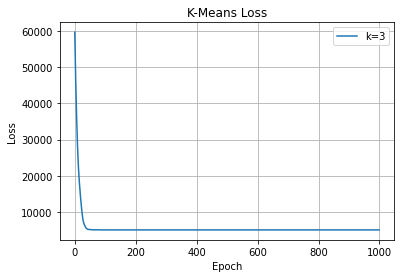

In [0]:
loadData()

# Distance function for K-means
def distanceFunc(X, MU):
  X_new = tf.expand_dims(X,0)
  MU_new = tf.expand_dims(MU, 1)
  dis = tf.reduce_sum(tf.square(tf.subtract(X_new,MU_new)),2)
  pair_dist = tf.transpose(dis)
  return pair_dist

def k_loss(X,MU):
  loss = tf.reduce_sum(tf.reduce_min(distanceFunc(X,MU),1))
  return loss

def k_means(K):
  D = dim
  N = num_pts
  val_loss = []
  print('Number of points: {}'.format(num_pts))
  graph = tf.Graph()
  with graph.as_default():
    x = tf.compat.v1.placeholder(tf.float32,shape=(N,D))
    mu = tf.Variable(tf.compat.v1.truncated_normal([K,D],stddev=0.05))
    loss = k_loss(x,mu)
    optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.1, beta1=0.9, beta2=0.99, epsilon=1e-5).minimize(loss)

  with tf.compat.v1.Session(graph=graph) as session:
    tf.compat.v1.initialize_all_variables().run()
    print('Initialized')
    dist_mat = distanceFunc(x,mu)
    for step in range(iterations):
      centers, l, _, dist = session.run([mu,loss,optimizer,dist_mat], feed_dict={x:data})
      val_loss.append(l)
      # if (step % 10 == 0):
      #     print('Loss at step {}: {}'.format(step, l))
    clusters = np.argmin(dist, 1)
  
  for i in range(K):
    percent = np.sum(np.equal(i, clusters))/len(clusters)
    print("Cluster:", i, "percentage:", percent)
  
  print('Final Loss with K-Means, with K = {0}: {1}'.format(K, val_loss[-1]))
  return (val_loss, clusters, centers)

#Loss # vs Updates
plt.title("K-Means Loss")
plt.plot(k_means(3)[0], label='k=3')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('plots/111_kmeans_k3.png')

### 1.1.2 Different K values (1, 2, 3, 4, 5)

Number of points: 10000
Initialized
Cluster: 0 percentage: 1.0
Final Loss with K-Means, with K = 1: 38454.06640625
Number of points: 10000
Initialized
Cluster: 0 percentage: 0.5047
Cluster: 1 percentage: 0.4953
Final Loss with K-Means, with K = 2: 9203.595703125
Number of points: 10000
Initialized
Cluster: 0 percentage: 0.2379
Cluster: 1 percentage: 0.3795
Cluster: 2 percentage: 0.3826
Final Loss with K-Means, with K = 3: 5111.62109375
Number of points: 10000
Initialized
Cluster: 0 percentage: 0.373
Cluster: 1 percentage: 0.1204
Cluster: 2 percentage: 0.1353
Cluster: 3 percentage: 0.3713
Final Loss with K-Means, with K = 4: 3374.1298828125
Number of points: 10000
Initialized
Cluster: 0 percentage: 0.3575
Cluster: 1 percentage: 0.0885
Cluster: 2 percentage: 0.107
Cluster: 3 percentage: 0.3624
Cluster: 4 percentage: 0.0846
Final Loss with K-Means, with K = 5: 2847.41552734375


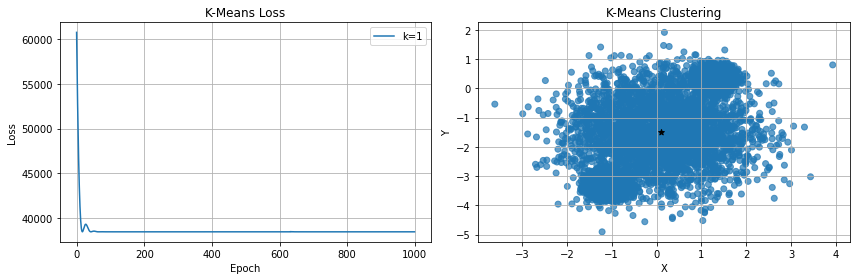

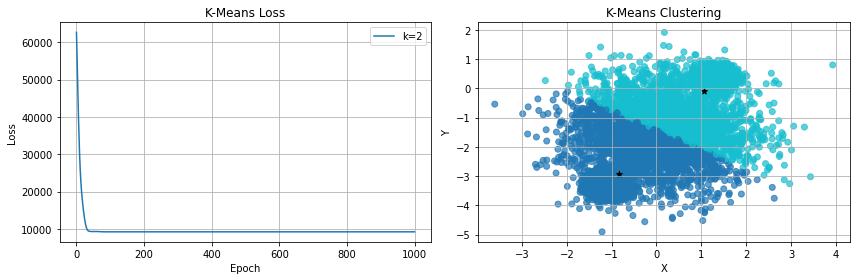

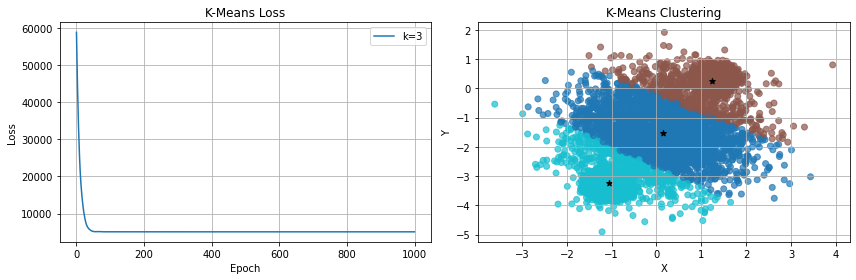

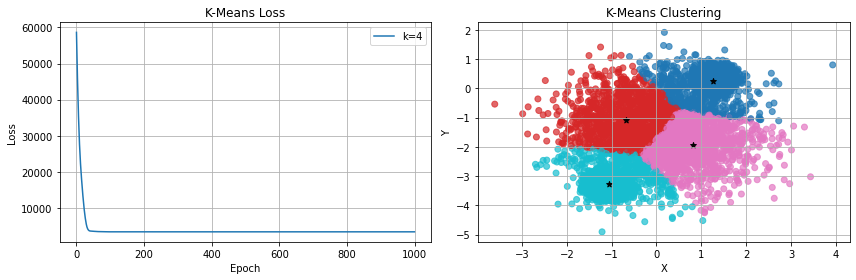

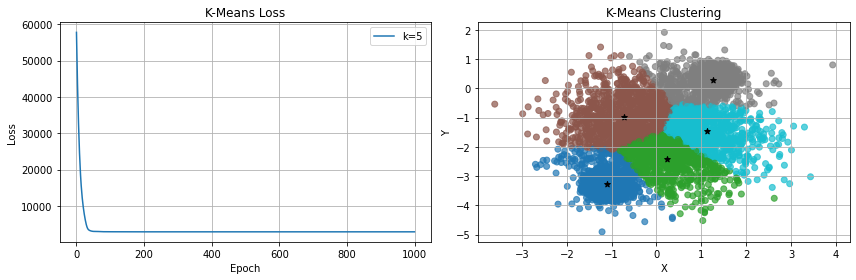

In [0]:
def plot_kmeans(values, validation=False):
  for val in values:
    f, (loss_plot, cluster_plot) = plt.subplots(1, 2, figsize=(12,4))
    loss_plot.title.set_text("K-Means Loss")
    loss_plot.set(xlabel='Epoch', ylabel='Loss')
    loss_plot.grid(True)
    cluster_plot.title.set_text("K-Means Clustering")
    cluster_plot.set(xlabel='X', ylabel='Y')
    cluster_plot.grid(True)

    loss, clusters, centers = k_means(val)
    loss_plot.plot(loss, label='k={}'.format(val))
    loss_plot.legend(loc='best')
    cluster_plot.scatter(data[:, 0], data[:, 1], c=clusters, cmap=plt.get_cmap('tab10'), alpha=0.7)
    cluster_plot.scatter(centers[:, 0], centers[:, 1], marker='*', c="black", cmap=plt.get_cmap('Set1'), linewidths=1)
    f.savefig('plots/112_kmeans_k{0}_validation{1}.png'.format(val,validation))
    plt.tight_layout()

plot_kmeans([1,2,3,4,5])

### 1.1.3 Validation Data

Number of points: 3333
Initialized
Cluster: 0 percentage: 1.0
Final Loss with K-Means, with K = 1: 12853.2607421875
Number of points: 3333
Initialized
Cluster: 0 percentage: 0.4821482148214821
Cluster: 1 percentage: 0.5178517851785178
Final Loss with K-Means, with K = 2: 2958.72705078125
Number of points: 3333
Initialized
Cluster: 0 percentage: 0.37473747374737476
Cluster: 1 percentage: 0.2298229822982298
Cluster: 2 percentage: 0.39543954395439546
Final Loss with K-Means, with K = 3: 1608.8714599609375
Number of points: 3333
Initialized
Cluster: 0 percentage: 0.36633663366336633
Cluster: 1 percentage: 0.38823882388238823
Cluster: 2 percentage: 0.11401140114011402
Cluster: 3 percentage: 0.13141314131413143
Final Loss with K-Means, with K = 4: 1052.8521728515625
Number of points: 3333
Initialized
Cluster: 0 percentage: 0.10711071107110712
Cluster: 1 percentage: 0.384038403840384
Cluster: 2 percentage: 0.07260726072607261
Cluster: 3 percentage: 0.36423642364236425
Cluster: 4 percentage: 0

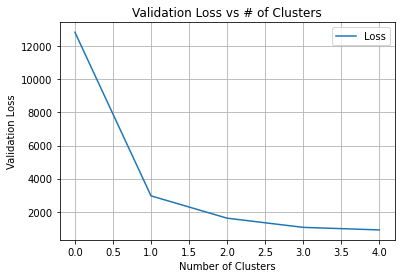

In [0]:
loadData(True)

def plot_elbow(values):
  plt.title("Validation Loss vs # of Clusters")
  plt.xlabel('Number of Clusters')
  plt.ylabel('Validation Loss')
  plt.grid(True)
  val_loss = []
  for val in values:
    val_loss.append(k_means(val)[0][iterations-1])
  plt.plot(val_loss, label='Loss')
  plt.legend(loc='best')
  plt.savefig('plots/113_loss_clusters.png')

plot_elbow([1,2,3,4,5])

# Part 2: Mixtures of Gaussians

## 2.1  The Gaussian cluster mode

### 2.1.1 Log Gaussian PDF

In [0]:
loadData()

def log_GaussPDF(X, mu, sigma):
  # Inputs
  # X: N X D
  # mu: K X D
  # sigma: K X 1

  # Outputs:
  # log Gaussian PDF N X K
  dim = tf.to_float(tf.rank(X))
  distance = distanceFunc(X, mu)
  two_sig_dist = tf.div(distance, 2*tf.squeeze(sigma))
  log_term = (-0.5*dim)*tf.log(2*np.pi*sigma)
  
  return tf.transpose(log_term) - two_sig_dist

### 2.1.2 Log Probability of cluster

In [0]:
def log_posterior(log_PDF, log_pi):
  # Input
  # log_PDF: log Gaussian PDF N X K
  # log_pi: K X 1

  # Outputs
  # log_post: N X K
  log_sum = tf.add(log_PDF, log_pi)

  return hlp.logsoftmax(log_sum)

## 2.2 Learning the MoG

### 2.2.1 Loss Function

Number of points: 10000
Initialized
Final Loss with MoG, with K = 3: 17132.83203125


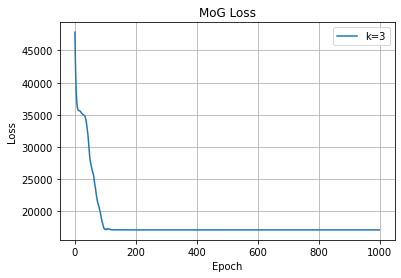

In [0]:
def mog_loss(K):
  D = dim
  N = num_pts
  val_loss = []
  print('Number of points: {}'.format(num_pts))

  #Initialize all the variables
  graph = tf.Graph()
  with graph.as_default():
    x = tf.compat.v1.placeholder(tf.float32,shape=(N,D))
    mu = tf.Variable(tf.compat.v1.truncated_normal([K,D],stddev=0.05))
    pi = tf.Variable(tf.compat.v1.truncated_normal([K,1],stddev=0.05))
    sigma = tf.exp(tf.Variable(tf.compat.v1.truncated_normal([K,1],stddev=0.05)))

    log_pdf = log_GaussPDF(x, mu, sigma)
    loss = hlp.reduce_logsumexp(log_pdf + tf.squeeze(hlp.logsoftmax(pi)))
    loss = -1*tf.reduce_sum(loss)

    optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.1, beta1=0.9, beta2=0.99, epsilon=1e-5).minimize(loss)
  with tf.compat.v1.Session(graph=graph) as session:
    # This is a one-time operation which ensures the parameters get initialized as
    # we described in the graph: random weights for the matrix, zeros for the
    # biases.
    tf.compat.v1.initialize_all_variables().run()
    print('Initialized')
    dist_mat = distanceFunc(x,mu)
    for step in range(iterations):
      centers, l, _, dist = session.run([mu,loss,optimizer,dist_mat], feed_dict={x:data})
      val_loss.append(l)
      # if (step % 10 == 0):
      #     print('Loss at step {}: {}'.format(step, l))
    clusters = np.argmin(dist, 1)
    
  print('Final Loss with MoG, with K = {0}: {1}'.format(K, val_loss[-1]))
  return (val_loss, clusters, centers)

plt.title("MoG Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(mog_loss(3)[0], label='k=3')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('plots/221_mog_k3.png')

### 2.2.2 Validation Data + Different K values (1, 2, 3, 4, 5)

Number of points: 3333
Initialized
Final Loss with MoG, with K = 1: 11647.0166015625
Number of points: 3333
Initialized
Final Loss with MoG, with K = 2: 7973.9384765625
Number of points: 3333
Initialized
Final Loss with MoG, with K = 3: 5620.0703125
Number of points: 3333
Initialized
Final Loss with MoG, with K = 4: 5613.970703125
Number of points: 3333
Initialized
Final Loss with MoG, with K = 5: 5619.80908203125


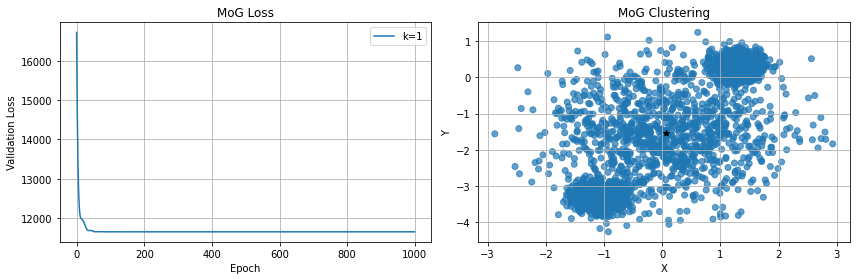

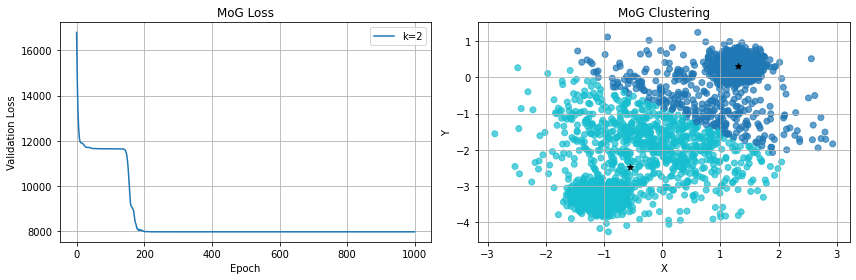

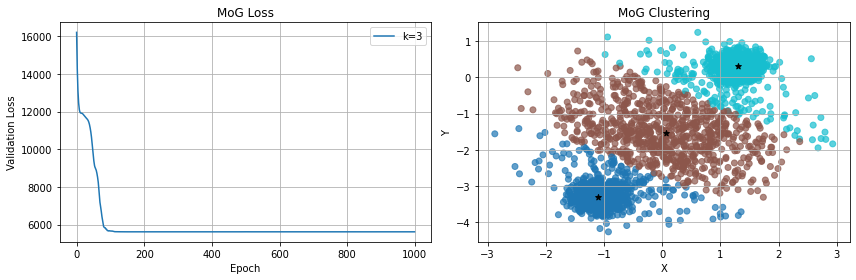

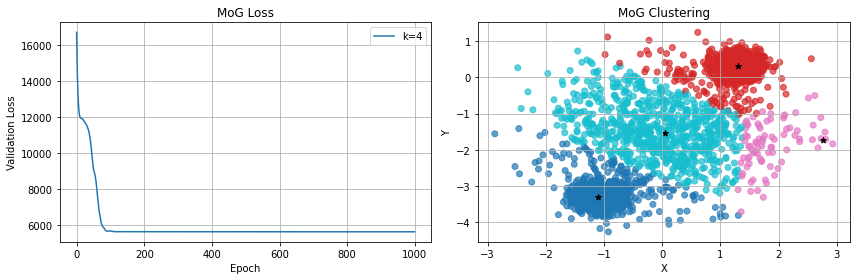

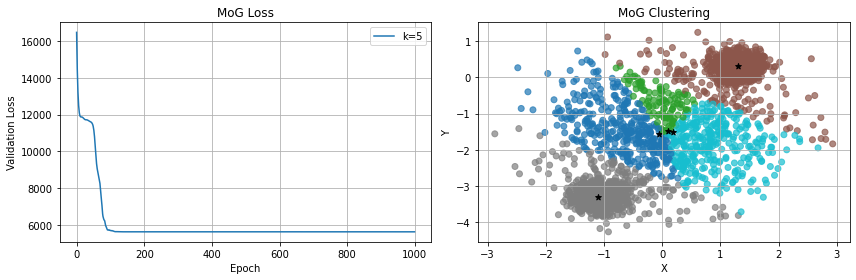

In [0]:
loadData(True)

def plot_mog(values, validation=False):
  for val in values:
    f, (loss_plot, cluster_plot) = plt.subplots(1, 2, figsize=(12,4))
    loss_plot.title.set_text("MoG Loss")
    loss_plot.set(xlabel='Epoch', ylabel='Validation Loss')
    loss_plot.grid(True)
    cluster_plot.title.set_text("MoG Clustering")
    cluster_plot.set(xlabel='X', ylabel='Y')
    cluster_plot.grid(True)

    loss, clusters, centers = mog_loss(val)
    loss_plot.plot(loss, label='k={}'.format(val))
    loss_plot.legend(loc='best')
    cluster_plot.scatter(data[:, 0], data[:, 1], c=clusters, cmap=plt.get_cmap('tab10'), alpha=0.7)
    cluster_plot.scatter(centers[:, 0], centers[:, 1], marker='*', c="black", cmap=plt.get_cmap('Set1'), linewidths=1)
    f.savefig('plots/222_mog_k{0}_validation{1}.png'.format(val,validation))
    plt.tight_layout()

plot_mog([1,2,3,4,5], True)

### 2.2.3 K-means and the MoG learning algorithms on data100D.npy

In [0]:
def plot_both(mog_vals, kmean_vals, validation=False):
  f, (mog_plot, kmeans_plot) = plt.subplots(1, 2, figsize=(12,4))
  mog_plot.title.set_text("MoG Loss")
  mog_plot.set(xlabel='Epoch', ylabel='Validation Loss')
  mog_plot.grid(True)
  for val in values:
    mog_plot.plot(mog_loss(val)[0], label='k={}'.format(val))
  mog_plot.legend(loc='best')

  kmeans_plot.title.set_text("K-Means Loss")
  kmeans_plot.set(xlabel='Epoch', ylabel='Validation Loss')
  kmeans_plot.grid(True)
  for val in values:
    kmeans_plot.plot(k_means(val)[0], label='k={}'.format(val))
  kmeans_plot.legend(loc='best')
  plt.tight_layout()
  
  f.savefig('plots/223.png'.format(val,validation))

Number of points: 3333
Initialized
Final Loss with MoG, with K = 5: 22480.5078125
Number of points: 3333
Initialized
Final Loss with MoG, with K = 10: 22064.48828125
Number of points: 3333
Initialized
Final Loss with MoG, with K = 15: 21314.30859375
Number of points: 3333
Initialized
Final Loss with MoG, with K = 20: 21314.390625
Number of points: 3333
Initialized
Final Loss with MoG, with K = 25: 21314.3046875
Number of points: 3333
Initialized
Final Loss with MoG, with K = 30: 21314.296875
Number of points: 3333
Initialized
Cluster: 0 percentage: 0.19921992199219923
Cluster: 1 percentage: 0.294029402940294
Cluster: 2 percentage: 0.1929192919291929
Cluster: 3 percentage: 0.0
Cluster: 4 percentage: 0.3138313831383138
Final Loss with K-Means, with K = 5: 116733.203125
Number of points: 3333
Initialized
Cluster: 0 percentage: 0.0
Cluster: 1 percentage: 0.16681668166816682
Cluster: 2 percentage: 0.08730873087308731
Cluster: 3 percentage: 0.19921992199219923
Cluster: 4 percentage: 0.107110

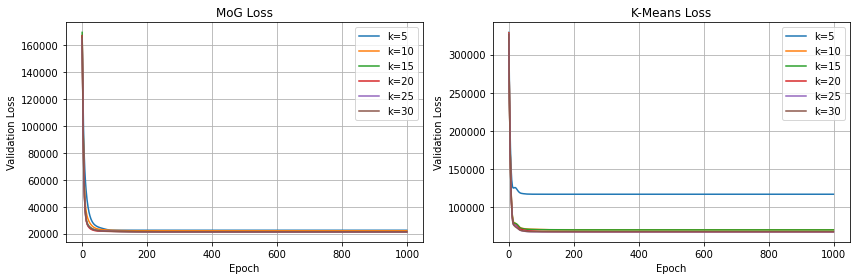

In [0]:
loadData(True, 'data100D.npy')
values = [5,10,15,20,25,30]

plot_both(values, values, True)